In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [5]:
archive=pd.read_csv('twitter-archive-enhanced.csv')
tweets=pd.read_csv('tweets_data.csv')
images=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',delimiter='\t')
print(f'entries in archive data {archive.shape[0]}')
print(f'entries in gathered data {tweets.shape[0]}')
print(f'entries in tweet images data {images.shape[0]}')


entries in archive data 2356
entries in gathered data 2322
entries in tweet images data 2075


In [6]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,12,10,None,None,None,pupper,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None


In [9]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [13]:
archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [14]:
print(f'missing values in images dataset {images.isna().sum()}')

print(f'duplicate records in images dataset {images.duplicated().sum()}')

missing values in images dataset tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
duplicate records in images dataset 0


In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive.duplicated().sum()

0

In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2322 non-null   int64
 1   favorite_count  2322 non-null   int64
 2   retweet_count   2322 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


## Data assessment

### Tidiness
1. doggo,floofer, pupper and puppo are in separate columns in archive dataset
2. More than 1 expanded url in the same cell in archive dataset

### Quality issues 
1. some dog name starting with small letter in archive dataset
2. small and capital letters on predicated breed 1, 2,3 in images dataset
3. Underscore in predicated breed 1,2,3 in images dataset 
4. Anchor tags on source links in archive dataset 
5. Values above and below 10 in rating_denominator in archive dataset
6. Duplicated links on expanded urls >>archive dataset
7. Irrelevant links(that do beleong to a tweet status) on expanded urls >> archive dataset 
8. timestamp in archive dataset is of object data type
9. Pupper and puppo mean puppy
10. Retweets in archive dataset 

## Data Cleaning 



In [124]:
archive_clean=archive.copy()
tweets_clean=tweets.copy()
images_clean=images.copy()

## Remove retweets from archive dataset

### Define
Drop rows with data on the in_reply_to_status_id

In [125]:
archive_clean=archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean.shape

(2278, 17)

In [128]:
archive_clean['in_reply_to_status_id'].notnull().sum()

0

### Dog name starting with small letter is not a dog name

#### Define
any dog name starting with small letter to be replaced with None 

In [129]:
#clean that
archive_clean['name']=archive_clean['name'].apply(lambda x :x=="None" if (x[0].islower()) else x)

In [130]:
#test 
archive_clean['name'].sample(10)

1045     Harold
1862       None
2176     Samsom
766        None
1106       None
783     Maximus
1304       None
268        None
642       Maude
503         Tyr
Name: name, dtype: object

### Some breed name start with small letter in p1, p2, p3, of the image dataset
#### Define 
Capitalize every breed name

In [131]:
#code 
images_clean['p1']= images_clean['p1'].str.capitalize()
images_clean['p2']= images_clean['p2'].str.capitalize()
images_clean['p3']= images_clean['p3'].str.capitalize()

In [132]:
images_clean[['p2', 'p2','p3']].sample(10)

,p2,p2,p3
1407,Labrador_retriever,Labrador_retriever,Kelpie
767,Chesapeake_bay_retriever,Chesapeake_bay_retriever,Doberman
1683,Great_dane,Great_dane,Curly-coated_retriever
227,English_setter,English_setter,Cocker_spaniel
775,Koala,Koala,Goose
1655,Eskimo_dog,Eskimo_dog,Tibetan_mastiff
787,Labrador_retriever,Labrador_retriever,Ice_bear
2038,Norwich_terrier,Norwich_terrier,Norfolk_terrier
923,French_bulldog,French_bulldog,American_staffordshire_terrier
388,Miniature_pinscher,Miniature_pinscher,Appenzeller


### Underscore on some breed names in p1,p2,p3 of the image dataset
#### Define 
Replace underscore with a blank space

In [133]:
images_clean['p1']=images_clean['p1'].str.replace('_', ' ')
images_clean['p2']=images_clean['p2'].str.replace('_', ' ')
images_clean['p3']=images_clean['p3'].str.replace('_', ' ')

In [134]:
images_clean[['p1','p2','p3']].head(10)

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater swiss mountain dog
6,Box turtle,Mud turtle,Terrapin
7,Chow,Tibetan mastiff,Fur coat
8,Shopping cart,Shopping basket,Golden retriever
9,Miniature poodle,Komondor,Soft-coated wheaten terrier


### Anchor tags on source links in archive dataset 
#### Define
Remove anchor tags from source links in archive dataset

In [135]:
archive_clean['source']=archive_clean['source'].str.replace('<a href="', '')
archive_clean['source']=archive_clean['source'].str.replace('</a>','')
archive_clean.source.head()

0    http://twitter.com/download/iphone" rel="nofol...
1    http://twitter.com/download/iphone" rel="nofol...
2    http://twitter.com/download/iphone" rel="nofol...
3    http://twitter.com/download/iphone" rel="nofol...
4    http://twitter.com/download/iphone" rel="nofol...
Name: source, dtype: object

### Values above and below 10 in rating_denominator in archive dataset
#### Define 
make all values in this column equal to 10

In [136]:
archive_clean['rating_denominator']=archive_clean['rating_denominator'].apply(
    lambda x: 10 if (x!=10) else x)

In [137]:
#test
archive_clean.query('rating_denominator !=10').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### More than 1 url and duplicates in the same cell in expanded url column of the archive dataset
#### Define 

split elements in each cell and pick only one link that has a twitter domain link and store to the expanded url column. Links with other domains are not useful or rather don't point to the tweet status. 

In [138]:
new = archive_clean['expanded_urls'].str.split(",", n = 2, expand = True)

archive_clean['expanded_urls']=new[0]
#archive_clean['expanded_urls_1']=new[1]

In [139]:
archive_clean.expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

### doggo,floofer, pupper and puppo are in separate columns in archive dataset

#### Define 
Use melt to put these four categories in one column and drop the original individual columns.

In [140]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name',],
                           
                           var_name='dog_group', value_name='dog_type')

archive_clean=archive_clean.query('dog_type !="None"')
archive_clean.drop('dog_type', axis=1, inplace=True)

In [141]:
#test
archive_clean['dog_group'].sample(10)

6848     puppo
6157    pupper
6004    pupper
6358    pupper
6220    pupper
6098    pupper
7362     puppo
5485    pupper
747      doggo
5412    pupper
Name: dog_group, dtype: object

### Define 

Rename pupper and puppo to puppy , doggo to dog and floofer to dog. 
Accoording to slang dictionary floofer is another name for big dog especially if it is fluffy. Therefore, the dog group will have puppies and dogs. 

In [142]:
archive_clean['dog_group']=archive_clean['dog_group'].map(
    {'pupper':'puppy','puppo':'puppy','doggo':'dog','floofer':'dog'})

In [143]:
#test
archive_clean['dog_group'].value_counts()

puppy    282
dog      103
Name: dog_group, dtype: int64

### Data Merging 
Merge archive_clean with tweets_clean using a left join, tweets_clean being the left table. This is to avoid loosing valuable data in the tweets_clean table. Since we need only tweets with images, we do a left merge on the resulting dataset and images_clean; with images_clean as the left dataset.

In [144]:
twitter_archive_master=pd.merge(tweets_clean,archive_clean, left_on='tweet_id', right_on='tweet_id', how='left')
twitter_archive_master=pd.merge(images_clean, twitter_archive_master, left_on='tweet_id', right_on='tweet_id', how='left')
archive_clean.to_csv('archive_clean.csv', index=False)
images_clean.to_csv('images_clean.csv', index=False)
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_group
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#check shape
images_clean.shape

(2075, 12)

In [145]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2087 non-null   int64  
 1   jpg_url                     2087 non-null   object 
 2   img_num                     2087 non-null   int64  
 3   p1                          2087 non-null   object 
 4   p1_conf                     2087 non-null   float64
 5   p1_dog                      2087 non-null   bool   
 6   p2                          2087 non-null   object 
 7   p2_conf                     2087 non-null   float64
 8   p2_dog                      2087 non-null   bool   
 9   p3                          2087 non-null   object 
 10  p3_conf                     2087 non-null   float64
 11  p3_dog                      2087 non-null   bool   
 12  favorite_count              2064 non-null   float64
 13  retweet_count               2064 

## Analyzing and Visualizing Data

In [146]:
# pearsons test of correlation 
dt=twitter_archive_master[['retweet_count','favorite_count']].dropna()
cor, _=pearsonr(dt.retweet_count,dt.favorite_count)
print(f'The correlation between retweet_count and favorite_count is {cor}')

The correlation between retweet_count and favorite_count is 0.8594980844615059


In [147]:
twitter_archive_master['rating_numerator'].describe()

count    327.000000
mean      11.146789
std        1.976048
min        3.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       27.000000
Name: rating_numerator, dtype: float64

In [148]:
twitter_archive_master.favorite_count.describe()

count      2064.000000
mean       7429.984012
std       11237.394077
min           0.000000
25%        1407.000000
50%        3285.000000
75%        9234.250000
max      144175.000000
Name: favorite_count, dtype: float64

In [149]:
twitter_archive_master.retweet_count.describe()

count     2064.000000
mean      2366.862888
std       4132.442642
min         11.000000
25%        500.750000
50%       1116.000000
75%       2712.000000
max      70294.000000
Name: retweet_count, dtype: float64

In [150]:
grps=twitter_archive_master.groupby('dog_group')['retweet_count','favorite_count'].mean()
print(grps)

           retweet_count  favorite_count
dog_group                               
dog          6145.047059    15734.976471
puppy        2480.508264     7533.396694


C:\Users\RONNY\AppData\Local\Temp\ipykernel_7956\5128617.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grps=twitter_archive_master.groupby('dog_group')['retweet_count','favorite_count'].mean()


### Insights 

1. There is a strong positive correlation between favorite count and retweet count. 
2. Mean rating is 11.2, half of the ratings fall below 11. The lowest rating is 3.
3. Favorite counts range from 0 to 144175 with three-quater falling below 9234. Half of the        tweets had at most 3285 favorite counts. 
5. Retweet counts for the sample ranged from 1 to 70294. The average retweet count for the          sample was 2366. 

#### Visualization 

The graph indicate a strong correlation between retweet counts and favorite counts. This implies as the higher the number of retweets the higher the number of love reactions and vice versa is true. 

<Figure size 864x432 with 0 Axes>

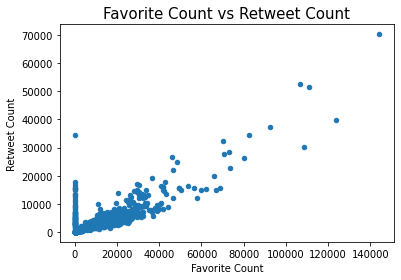

In [151]:
plt.figure(figsize=(12,6));
twitter_archive_master.plot(y='retweet_count', x='favorite_count', kind='scatter');
plt.xlabel('Favorite Count', size=10)
plt.ylabel('Retweet Count', size=10)
plt.title('Favorite Count vs Retweet Count', size=15)
plt.show();

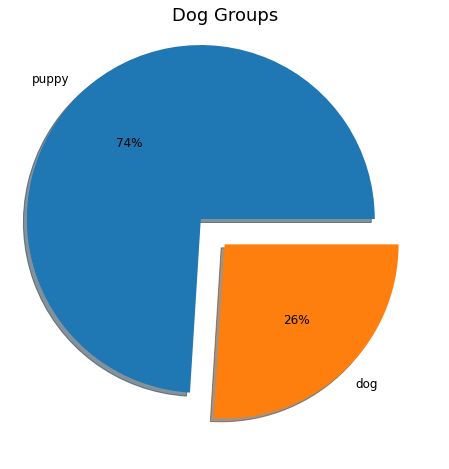

In [152]:
dog_grp=twitter_archive_master.dog_group.value_counts()
plt.gcf().set_size_inches(18, 8)
explode=[0.2,0]
dog_grp.plot(kind='pie',autopct='%.0f%%',textprops={'size': 'large'},shadow=True, labels=dog_grp.index,ylabel='', explode=explode)
plt.title('Dog Groups', size=18);
plt.show()